In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-5000-movie-dataset/movie_metadata.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Let us import the data set into the data variable

In [3]:
data = pd.read_csv('../input/imdb-5000-movie-dataset/movie_metadata.csv')

*The first 5 rows of the data are*

In [4]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


*Let us take a look at the shape of the data set*

In [5]:
data.shape

(5043, 28)

# Data Analysis

*Now let us take a look at some information regarding this dataset*'

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

*Let us now describe the data*

In [7]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [8]:
print("Number of Movies Surveyed is equal to " + str(len(data)))

Number of Movies Surveyed is equal to 5043


In [9]:
data.groupby('imdb_score').size()

imdb_score
1.6    1
1.7    1
1.9    3
2.0    2
2.1    3
      ..
9.0    3
9.1    3
9.2    1
9.3    1
9.5    1
Length: 78, dtype: int64

In [10]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

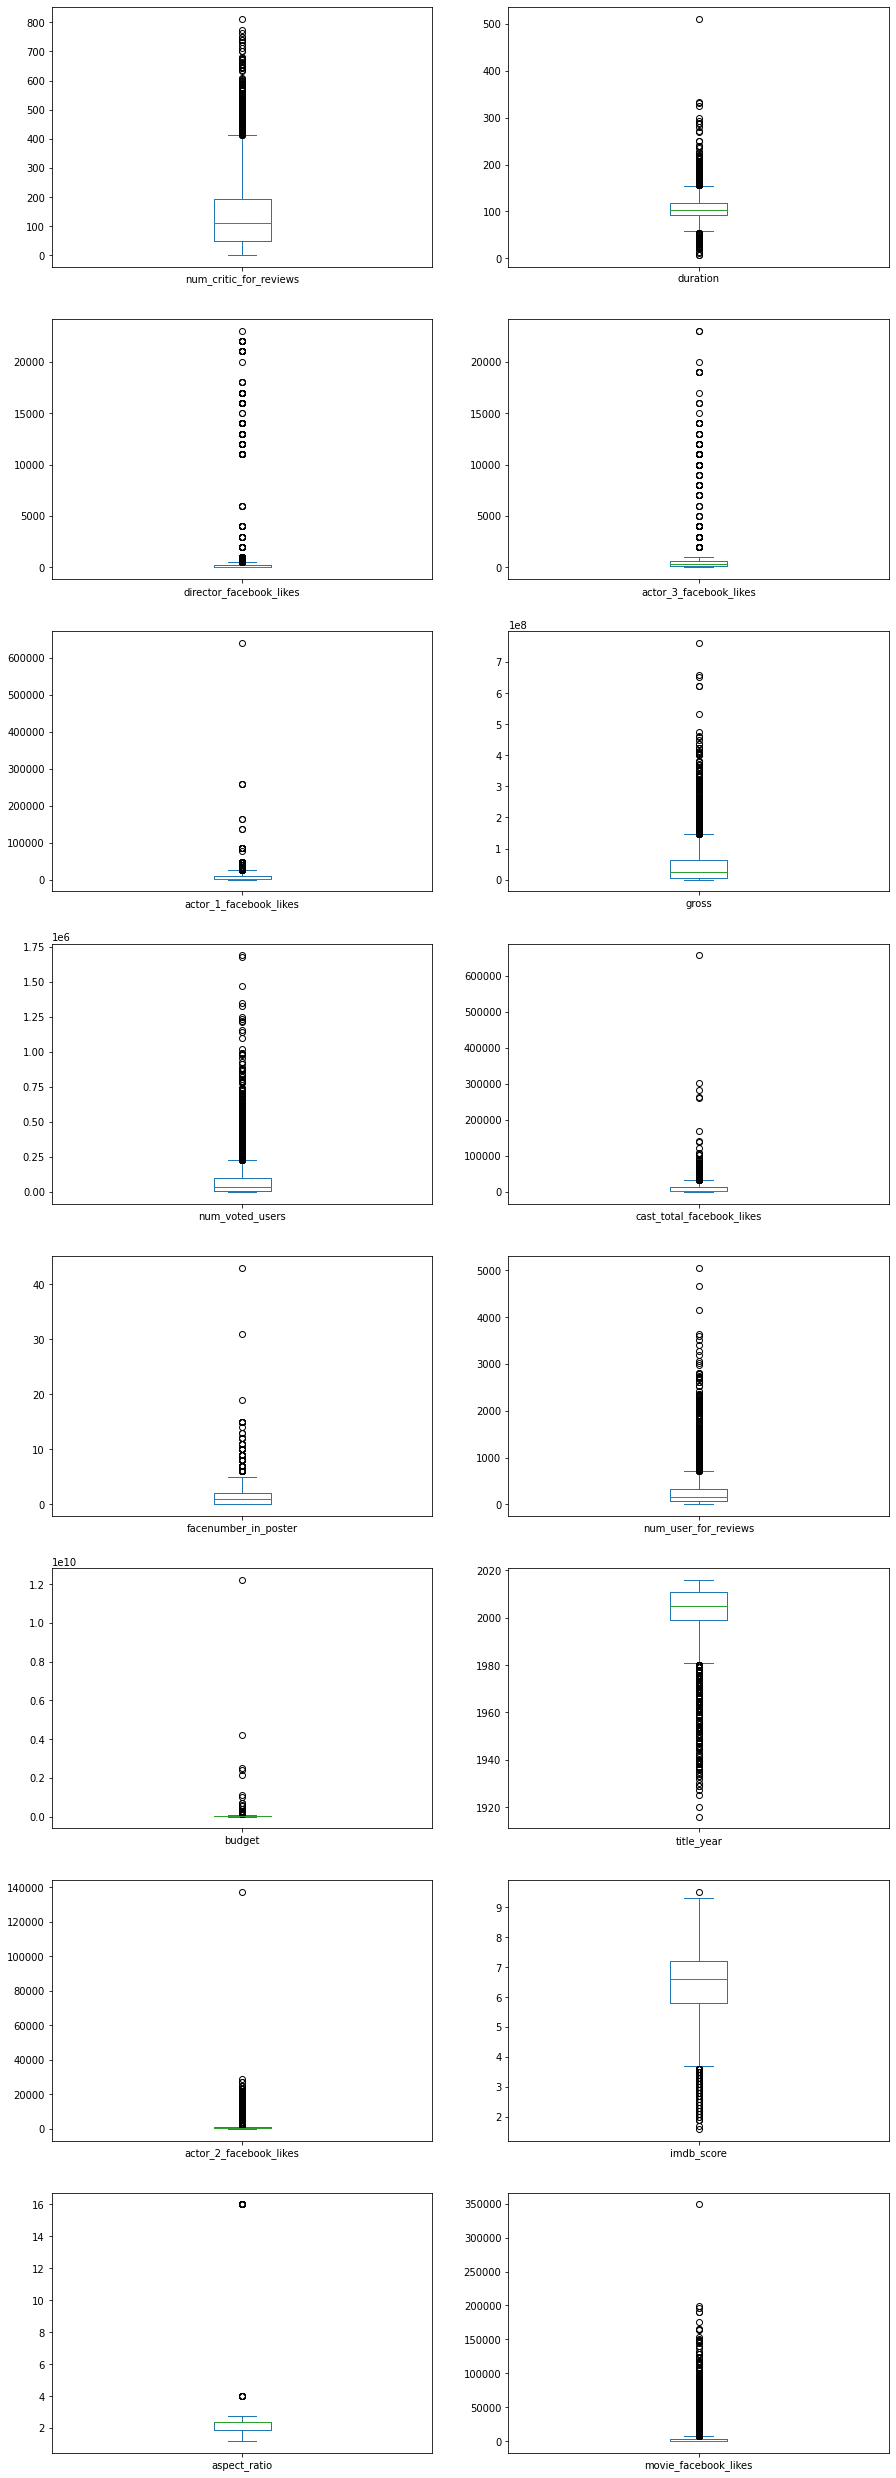

In [11]:
data.plot(kind='box', subplots=True, layout=(8,2), sharex=False, sharey=False, figsize=(15,45))
plt.show()

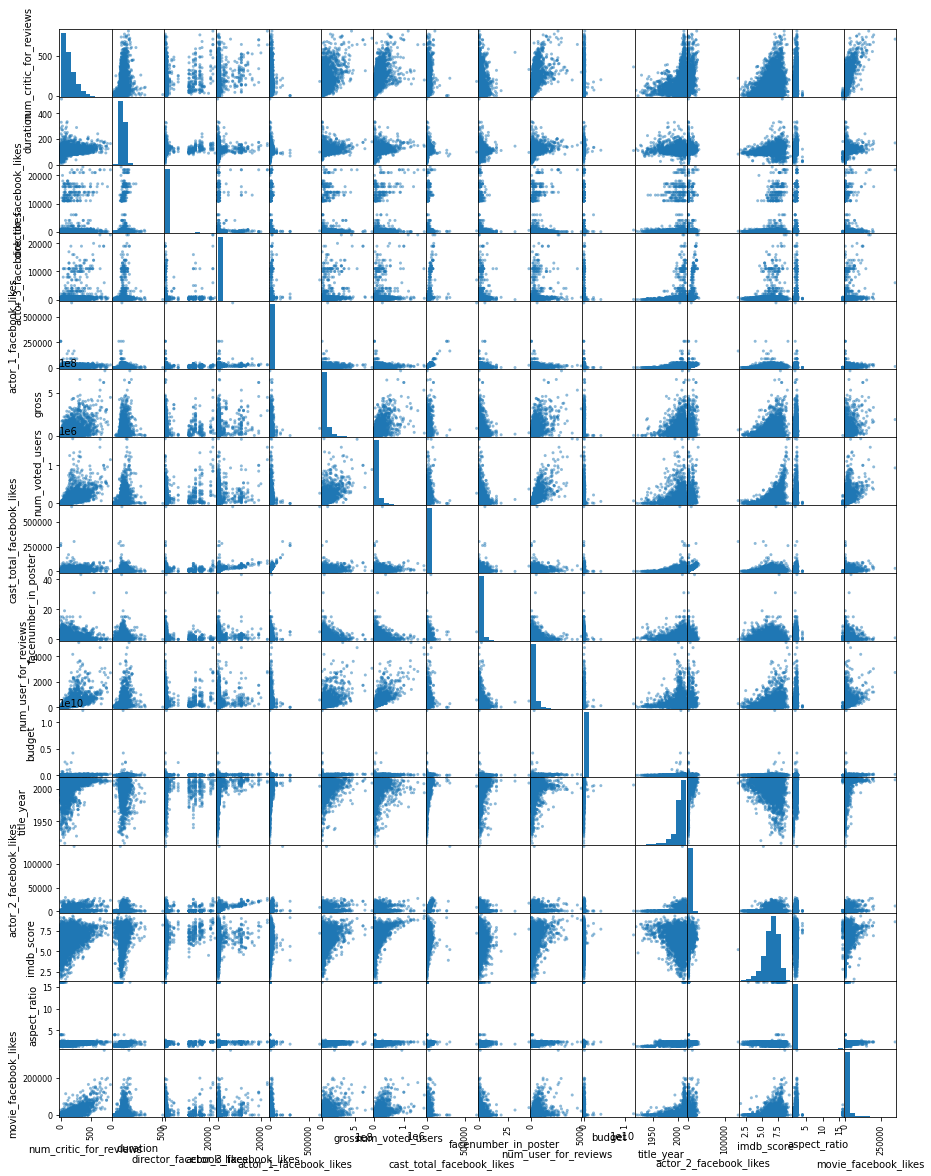

In [12]:
scatter_matrix(data, figsize=(15,20))
plt.show()

In [13]:
eight_plus = data.loc[data['imdb_score'] >=8]
below_four = data.loc[data['imdb_score']<4]
above_four = data.loc[data['imdb_score']>=4]
four_to_seven = data.loc[data['imdb_score']<8]

In [14]:
eight_plus.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
27,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
43,Color,Lee Unkrich,453.0,103.0,125.0,721.0,John Ratzenberger,15000.0,414984497.0,Adventure|Animation|Comedy|Family|Fantasy,...,733.0,English,USA,G,200000000.0,2010.0,1000.0,8.3,1.85,30000
47,Color,Bryan Singer,539.0,149.0,0.0,20000.0,Peter Dinklage,34000.0,233914986.0,Action|Adventure|Fantasy|Sci-Fi|Thriller,...,752.0,English,USA,PG-13,200000000.0,2014.0,22000.0,8.0,2.35,82000


In [15]:
below_four.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
217,Color,Joel Schumacher,183.0,125.0,541.0,409.0,Vivica A. Fox,920.0,107285004.0,Action,...,1018.0,English,USA,PG-13,125000000.0,1997.0,890.0,3.7,1.85,0
267,Color,Jan de Bont,79.0,121.0,101.0,202.0,Temuera Morrison,673.0,48068396.0,Action|Crime|Romance|Thriller,...,248.0,English,USA,PG-13,160000000.0,1997.0,368.0,3.7,2.35,894
273,Color,Bo Welch,109.0,82.0,34.0,434.0,Kelly Preston,760.0,100446895.0,Adventure|Comedy|Family|Fantasy,...,456.0,English,USA,PG,109000000.0,2003.0,743.0,3.8,1.85,946
313,Color,Pitof,212.0,87.0,26.0,566.0,Christopher Heyerdahl,827.0,40198710.0,Action|Crime|Fantasy|Romance|Thriller,...,660.0,English,USA,PG-13,100000000.0,2004.0,825.0,3.3,2.35,0
319,Color,Lawrence Guterman,78.0,94.0,6.0,227.0,Traylor Howard,490.0,17010646.0,Comedy|Family|Fantasy,...,239.0,English,USA,PG,84000000.0,2005.0,294.0,2.2,1.85,881


In [16]:
four_to_seven.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


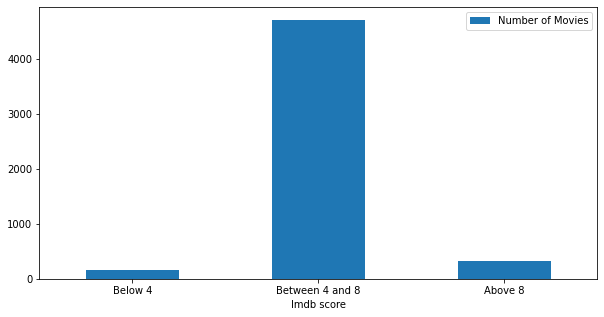

In [17]:
df = pd.DataFrame({'Imdb score':['Below 4', 'Between 4 and 8', 'Above 8'], 'Number of Movies':[len(below_four), len(four_to_seven), len(eight_plus)]})
ax = df.plot.bar(x='Imdb score', y='Number of Movies', rot=0, figsize = (10,5))

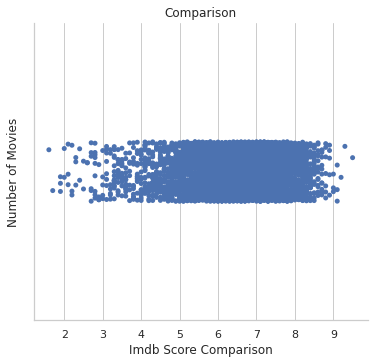

In [18]:
sns.set_theme(style="whitegrid")
sns.catplot(x= "imdb_score", data = data)
plt.xlabel("Imdb Score Comparison")
plt.ylabel("Number of Movies")
plt.title("Comparison")
plt.show()

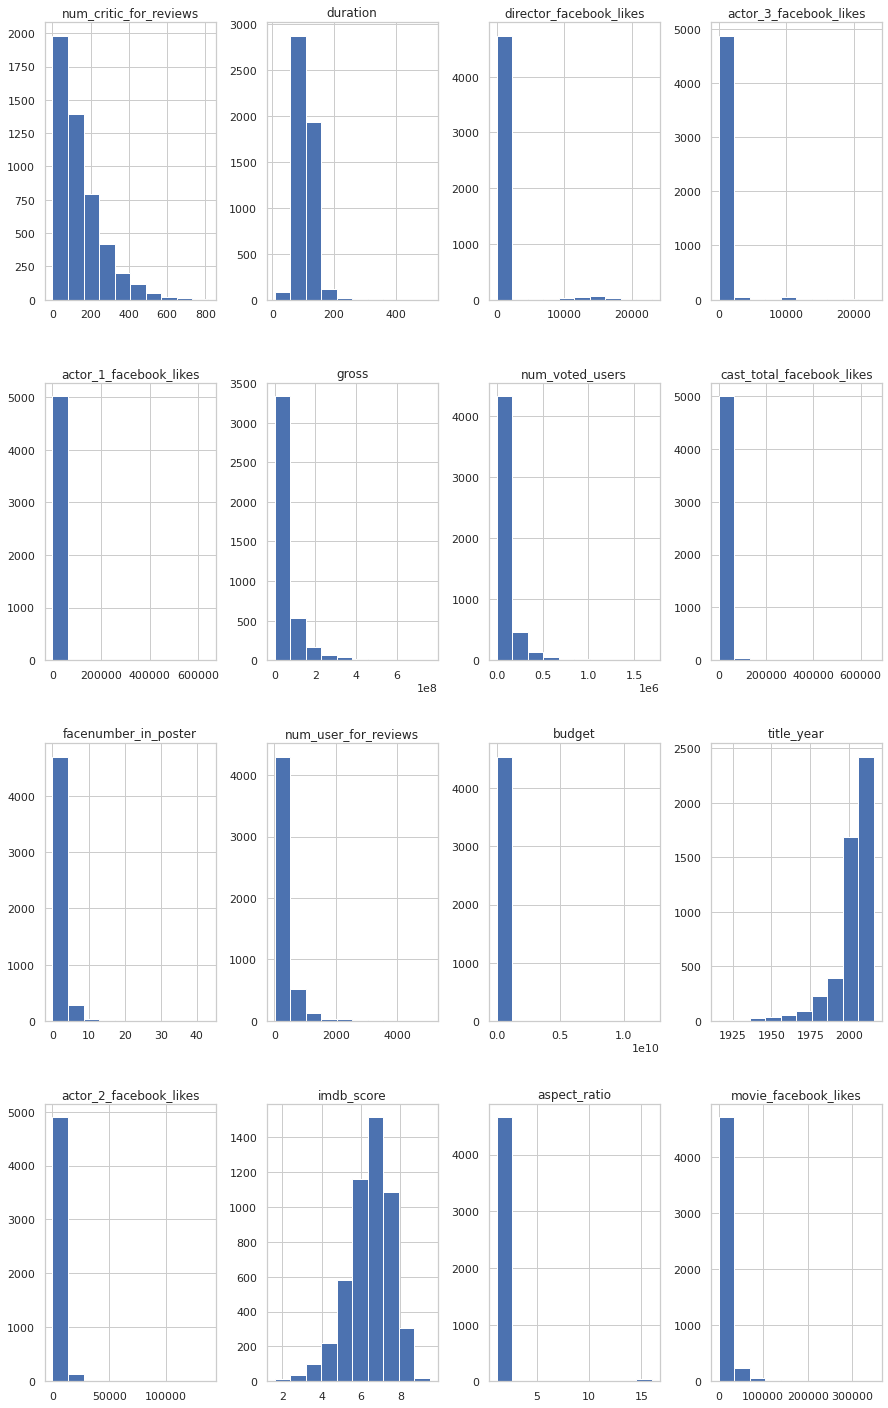

In [19]:
data.hist(figsize=(15,25))
plt.show()

In [20]:
data.isnull()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,True,False,True,False,False,True,False,...,True,True,True,True,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,True,False,False,False,True,False
5039,False,True,False,False,True,False,False,False,True,False,...,False,False,False,False,True,True,False,False,False,False
5040,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
5041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [21]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

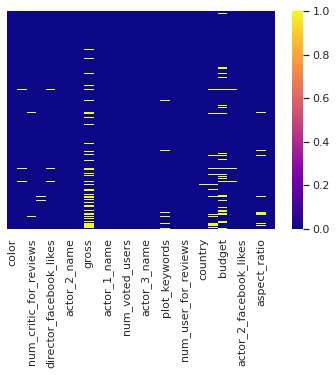

In [22]:
sns.heatmap(data.isnull(), yticklabels = False, cmap = "plasma")
plt.show()

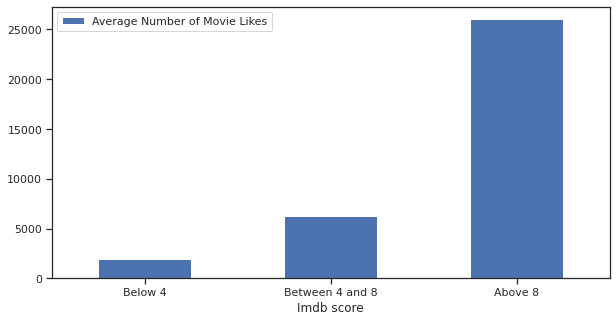

In [23]:
avg_movie_likes_below_four = below_four['movie_facebook_likes'].mean()
avg_movie_likes_four_to_seven = four_to_seven['movie_facebook_likes'].mean()
avg_movie_likes_eight_plus = eight_plus['movie_facebook_likes'].mean()
sns.set_theme(style="ticks")
df = pd.DataFrame({'Imdb score':['Below 4', 'Between 4 and 8', 'Above 8'], 'Average Number of Movie Likes':[avg_movie_likes_below_four, avg_movie_likes_four_to_seven,avg_movie_likes_eight_plus]})
ax = df.plot.bar(x='Imdb score', y='Average Number of Movie Likes', rot=0, figsize = (10,5))

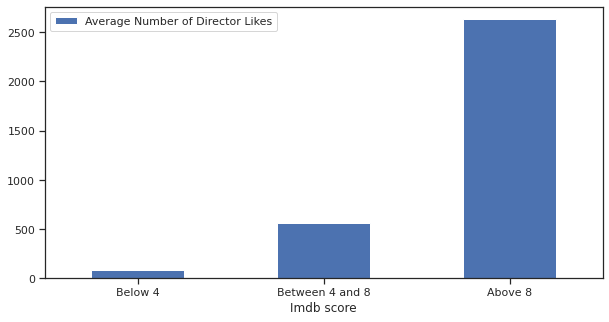

In [24]:
avg_director_likes_below_four = below_four['director_facebook_likes'].mean()
avg_director_likes_four_to_seven = four_to_seven['director_facebook_likes'].mean()
avg_director_likes_eight_plus = eight_plus['director_facebook_likes'].mean()
sns.set_theme(style="ticks")
df = pd.DataFrame({'Imdb score':['Below 4', 'Between 4 and 8', 'Above 8'], 'Average Number of Director Likes':[avg_director_likes_below_four, avg_director_likes_four_to_seven,avg_director_likes_eight_plus]})
ax = df.plot.bar(x='Imdb score', y='Average Number of Director Likes', rot=0, figsize = (10,5))

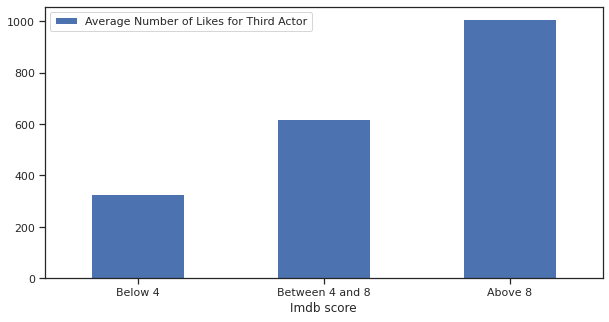

In [25]:
avg_actor3_likes_below_four = below_four['actor_3_facebook_likes'].mean()
avg_actor3_likes_four_to_seven = four_to_seven['actor_3_facebook_likes'].mean()
avg_actor3_likes_eight_plus = eight_plus['actor_3_facebook_likes'].mean()
sns.set_theme(style="ticks")
df = pd.DataFrame({'Imdb score':['Below 4', 'Between 4 and 8', 'Above 8'], 'Average Number of Likes for Third Actor':[avg_actor3_likes_below_four, avg_actor3_likes_four_to_seven,avg_actor3_likes_eight_plus]})
ax = df.plot.bar(x='Imdb score', y='Average Number of Likes for Third Actor', rot=0, figsize = (10,5))

In [26]:
dataset = data.iloc[:,[4,5]]
dataset.head()

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,NaN


In [27]:
dataset.shape

(5043, 2)

# Using the K-Means Clustering Method

In [28]:
from sklearn.cluster import KMeans

*Defining the model*

In [29]:
model = KMeans(n_clusters = 5)

In [30]:
dataset.isnull().sum()

director_facebook_likes    104
actor_3_facebook_likes      23
dtype: int64

In [31]:
dataset = dataset.fillna(dataset.mean())

In [32]:
dataset.isnull().sum()

director_facebook_likes    0
actor_3_facebook_likes     0
dtype: int64

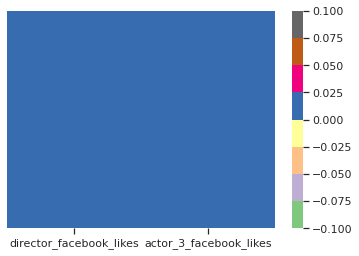

In [33]:
sns.heatmap(dataset.isnull(), yticklabels = False, cmap = "Accent")
plt.show()

In [34]:
model.fit(dataset)

KMeans(n_clusters=5)

In [35]:
model.cluster_centers_

array([[  165.17883939,   423.54434021],
       [12490.38461538,   605.93269231],
       [  210.77011494, 11126.43678161],
       [17621.21212121,   596.10606061],
       [17545.45454545, 14545.45454545]])

In [36]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [37]:
dataset['cluster'] = model.labels_

In [38]:
dataset.head()

,director_facebook_likes,actor_3_facebook_likes,cluster
0,0.0,855.000000,0
1,563.0,1000.000000,0
2,0.0,161.000000,0
3,22000.0,23000.000000,4
4,131.0,645.009761,0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


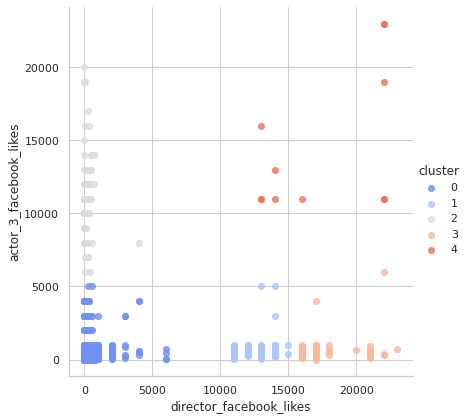

In [39]:
sns.set_style('whitegrid')
sns.lmplot('director_facebook_likes', 'actor_3_facebook_likes', data = dataset, hue = 'cluster', palette = 'coolwarm', size = 6, aspect = 1, fit_reg = False)
plt.show()